#### **1. Loading dataset and Importing libraries**

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from lazypredict.Supervised import LazyClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTEN

In [3]:
# Loading data
data = pd.read_csv("dataset\Hotel Reservations.csv")

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
# Drop Booking_ID feature
data.drop("Booking_ID", axis=1, inplace=True)

In [7]:
def des_anal(dataFrame):
    print("-------------------------------Shape---------------------------")
    print(f"{dataFrame.shape}\n\n")
    print("-------------------------------Columns-------------------------")
    print(f"{dataFrame.columns}\n\n")
    print("-------------------------------Desciptive-------------------------")
    print(f"{dataFrame.info()}\n\n")
    print("-------------------------------Null values-------------------------")
    print(f"{dataFrame.isnull().sum()}\n\n")
    print("-------------------------------Unique Values-------------------------")
    print(f"{dataFrame.nunique()}\n\n")
    print("-------------------------------Duplicated----------------------------")
    print(f"{dataFrame.duplicated().sum()}\n\n")

des_anal(data)

-------------------------------Shape---------------------------
(36275, 18)


-------------------------------Columns-------------------------
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


-------------------------------Desciptive-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children  

- 1. `no_of_adults`: Number of adults
- 2. `no_of_children`: Number of children
- 3. `no_of_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- 4. `no_of_week_nights`: Number of week nights (Monday to Friday) the guest stayed of booked to stay at the hotel
- 5. `type_of_mean_plan`: Type of meal plan booked by the customer
- 6. `required_car_parking_space`: Does the customer require a car parking space?
- 7. `room_type_reserved`: Type of room reserved by the customer
- 8. `lead_time`: Number of days between the date of booking and the arrival data
- 9. `arrival_year`: Year of arrival data
- 10. `arrival_month`: Month of arrival date
- 11. `arrival_data`: Date of the month
- 12. `market_segment_type`: Market segment designation
- 13. `repeated_guest`: Is the customer a repeated guest?
- 14. `no_of_previous_cancellations`: Number of previous bookings that were cancelled by the customer prior to the current booking
- 15. `no_of_previous_not_canceled`: Number of previous bookings not canceled by the customer prior to the current booking
- 16. `avg_price_per_room`: Average price per day of the reservation, prices of the rooms are dynamic
- 17. `no_of_special_requests`: Total number of special requests made by the customer
- Target. `booking_status`: Flag indicate if the booking was canceled or not


##### Feature Classification: Categorical vs Numerical

In [8]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


*Numerical*
- `no_of_adults`
- `no_of_children`
- `no_of_weekend_nights`
- `no_of_week_nights`
- `lead_time`
- `no_of_previous_cancellations`
- `no_of_previous_bookings_not_canceled`
- `avg_price_per_room`
- `no_of_special_request`

*Categorical*

1. Ordinal
- `require_car_parking_space`
- `room_type_reserved`
- `repeated_guest`



2. Nominal
- `type_of_meal_plan`
- `arrival_year`
- `arrival_month`
- `arrival_date`
- `market_segment_type`


In [9]:
num_features = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "lead_time",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "avg_price_per_room",
    "no_of_special_requests",
]

cat_features = [
    "required_car_parking_space",
    "room_type_reserved",
    "repeated_guest",
    "type_of_meal_plan",
    "arrival_year",
    "arrival_month",
    "arrival_date",
    "market_segment_type",
]

ord_features = [
    "required_car_parking_space",
    "room_type_reserved",
    "repeated_guest",
]

nom_features = [
    "type_of_meal_plan",
    "arrival_year",
    "arrival_month",
    "arrival_date",
    "market_segment_type",
]

In [10]:
# Convert type of targer column to categorical
data["booking_status"] = data["booking_status"].astype("category")

In [11]:
# Covert type of categorical feature use loop
for feature in cat_features:
    data[feature] = data[feature].astype("category")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  category
 9   arrival_month                         36275 non-null  category
 10  arrival_date                          36275 non-null  category
 11  ma

##### Distribution of Numerical Features

In [13]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00
mean,1.84,0.11,0.81,2.20,85.23,0.02,0.15,103.42,0.62
std,0.52,0.40,0.87,1.41,85.93,0.37,1.75,35.09,0.79
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,17.00,0.00,0.00,80.30,0.00
50%,2.00,0.00,1.00,2.00,57.00,0.00,0.00,99.45,0.00
75%,2.00,0.00,2.00,3.00,126.00,0.00,0.00,120.00,1.00
max,4.00,10.00,7.00,17.00,443.00,13.00,58.00,540.00,5.00


* Almost guest book room for 2 adults
* Most booking do not include children
* The number of weekend nights is mostly 1 or 2 days
* The number of week nights is mostly 1, 2 or 3 days
* Waiting period is mostly less than half a year
* Most reservation has no previous cancellation
* Most reservation has no special requets

Distrubution of Categorical Feature

In [14]:
data.describe(include="category")

,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,booking_status
count,36275,36275,36275,36275,36275,36275,36275,36275,36275
unique,4,2,7,2,12,31,5,2,2
top,Meal Plan 1,0,Room_Type 1,2018,10,13,Online,0,Not_Canceled
freq,27835,35151,28130,29761,5317,1358,23214,35345,24390


#### **2. EDA (Exploratory Data Analysis)**

Target Feature: `booking_status`

In [15]:
data["booking_status"].value_counts().to_frame()

,booking_status
Not_Canceled,24390
Canceled,11885


In [16]:
data["booking_status"].value_counts(normalize=True).to_frame()

,booking_status
Not_Canceled,0.67
Canceled,0.33


##### Unvariable Feature

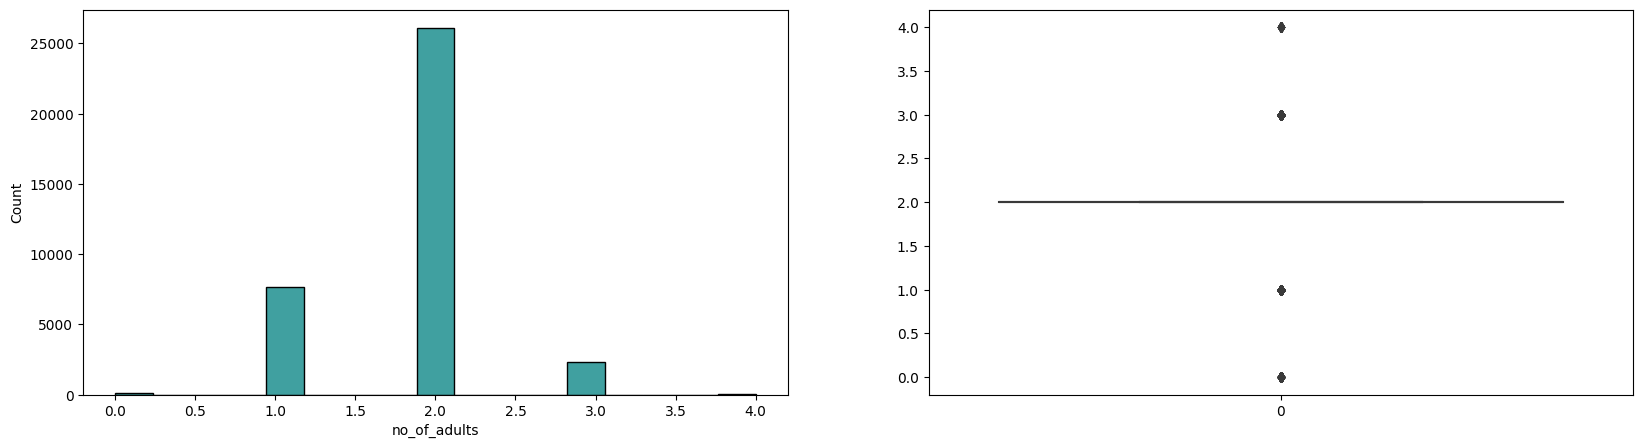

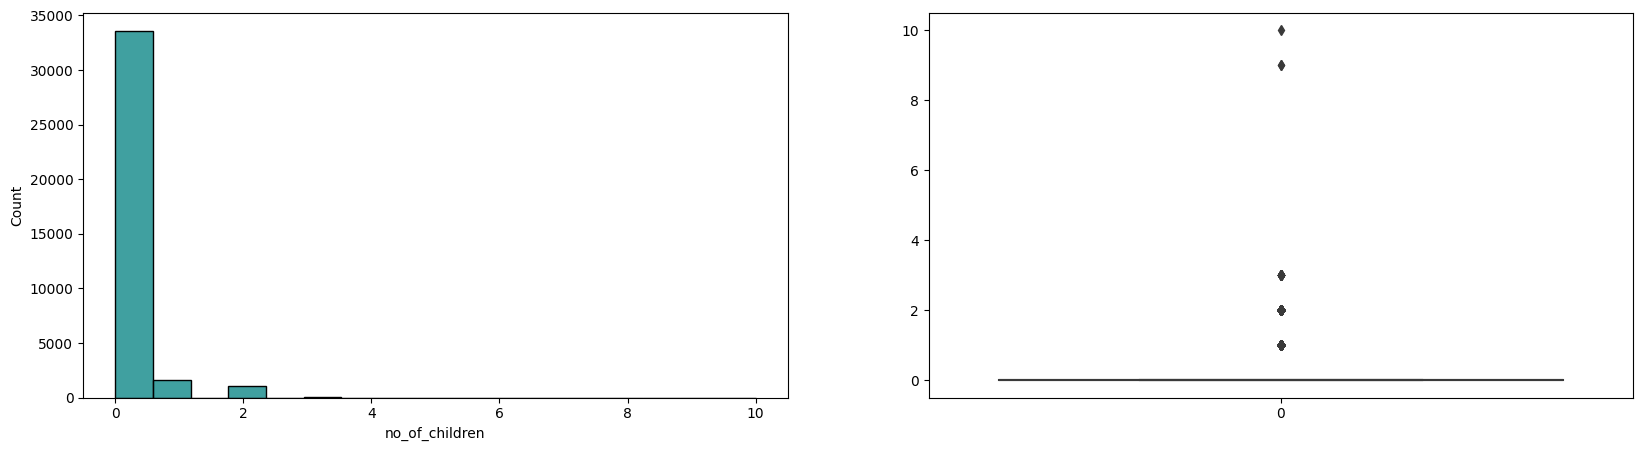

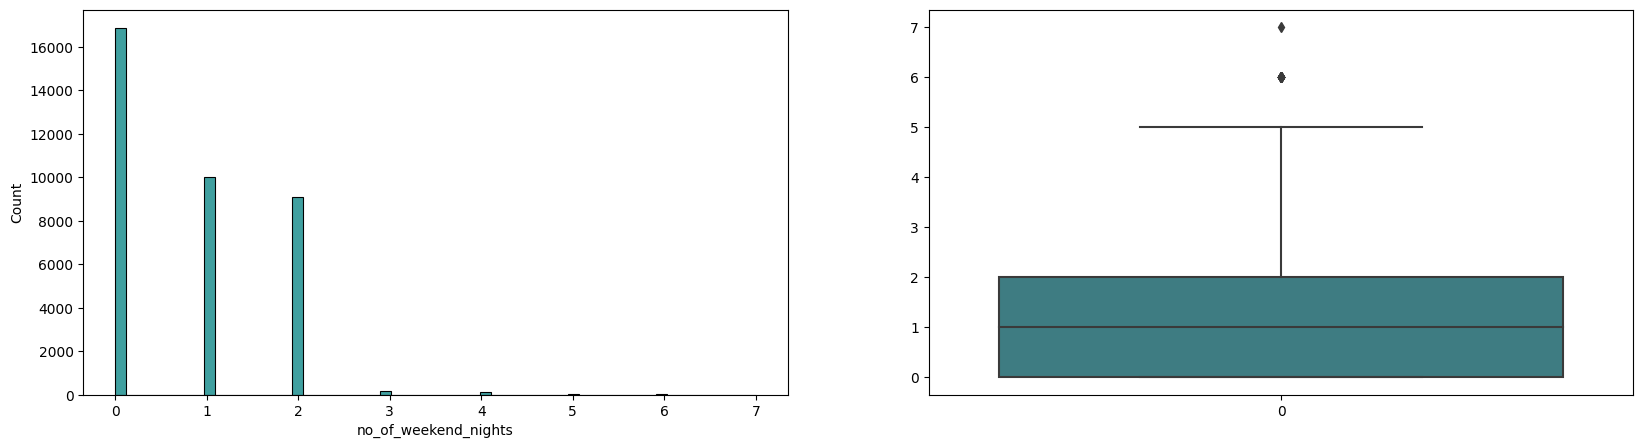

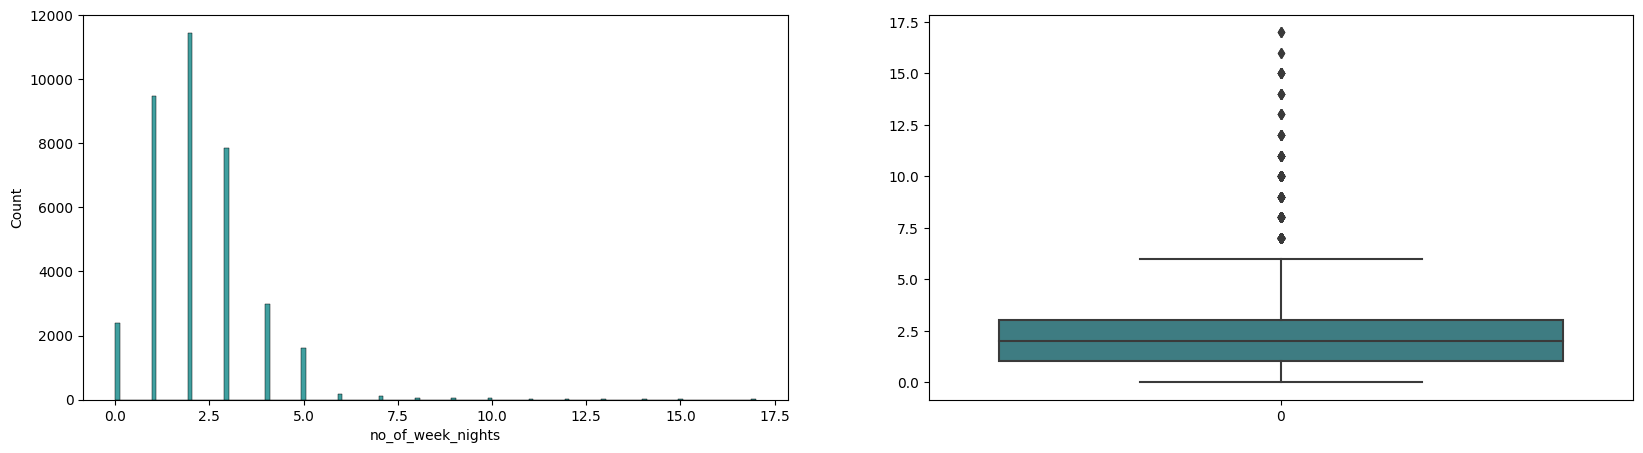

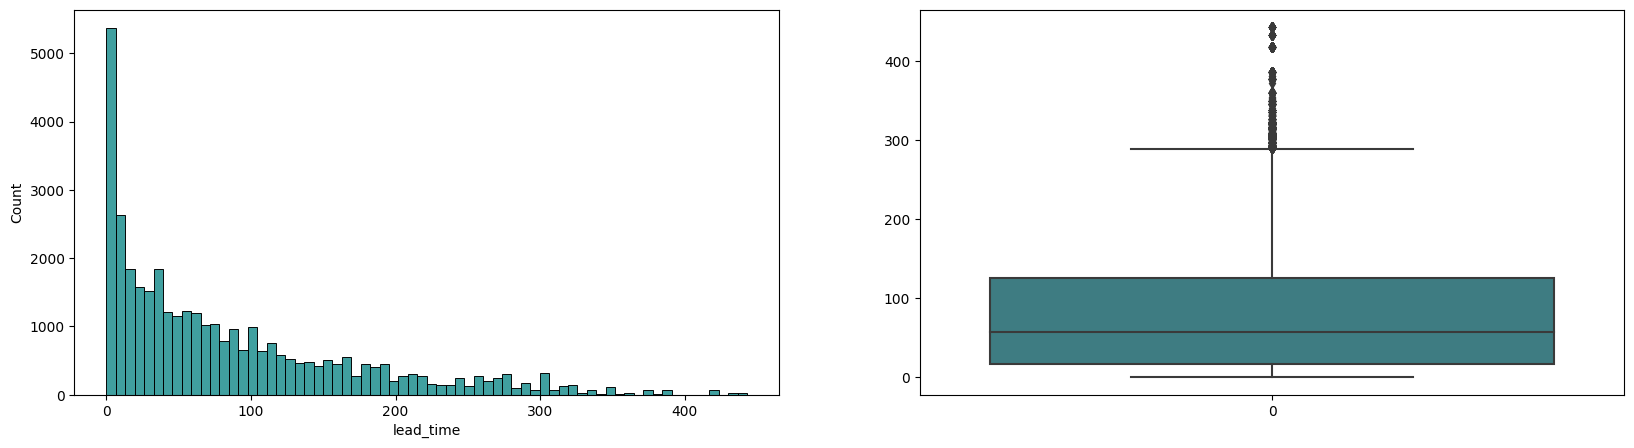

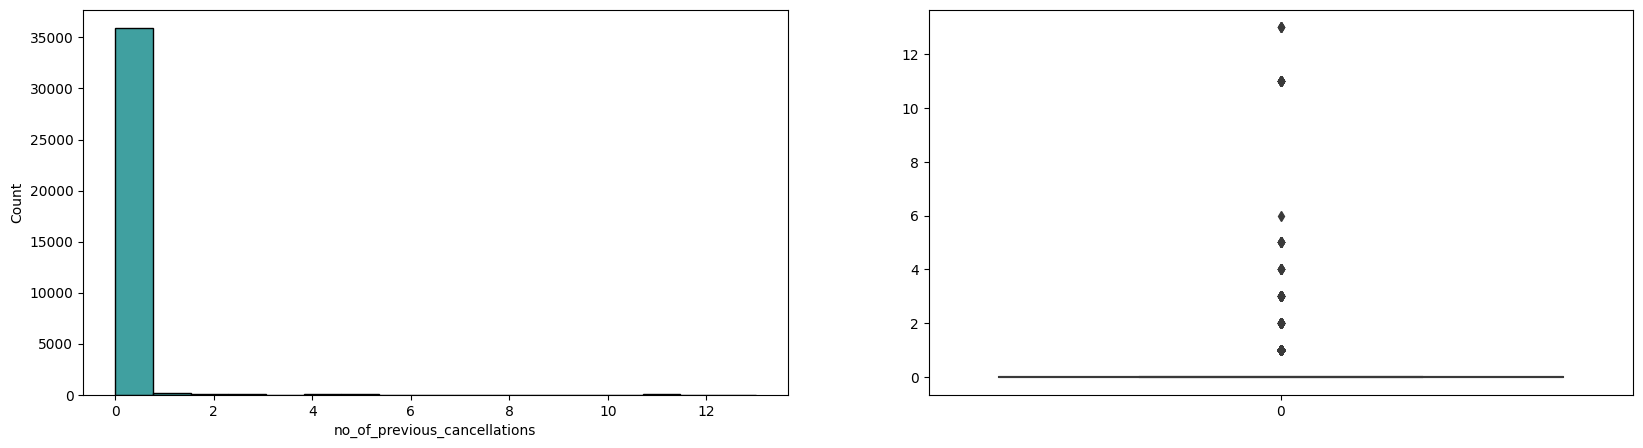

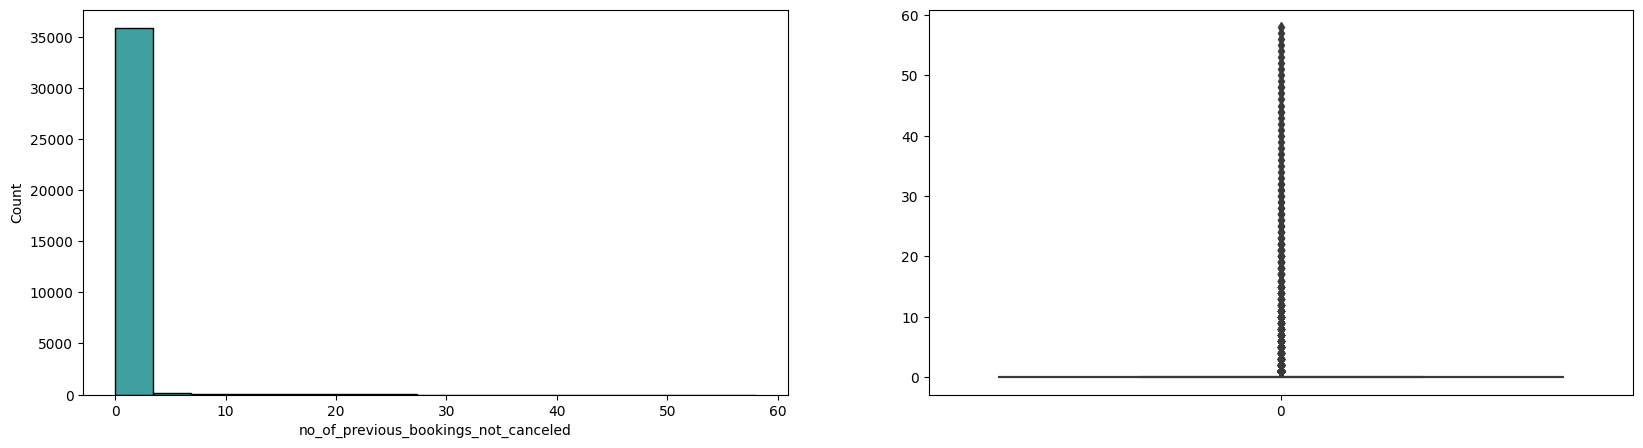

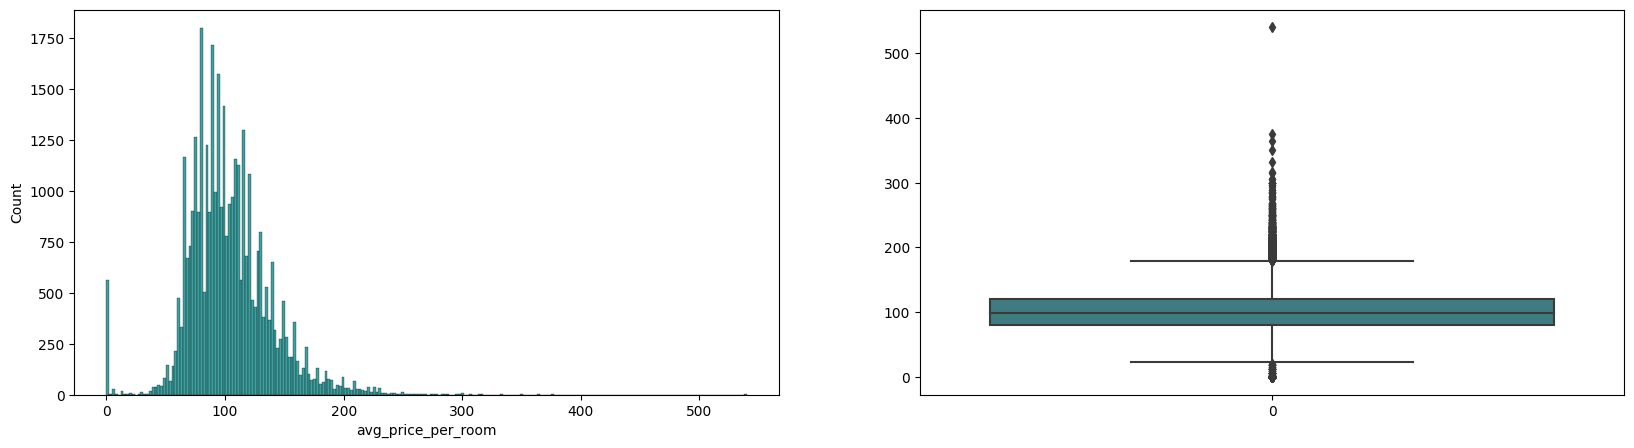

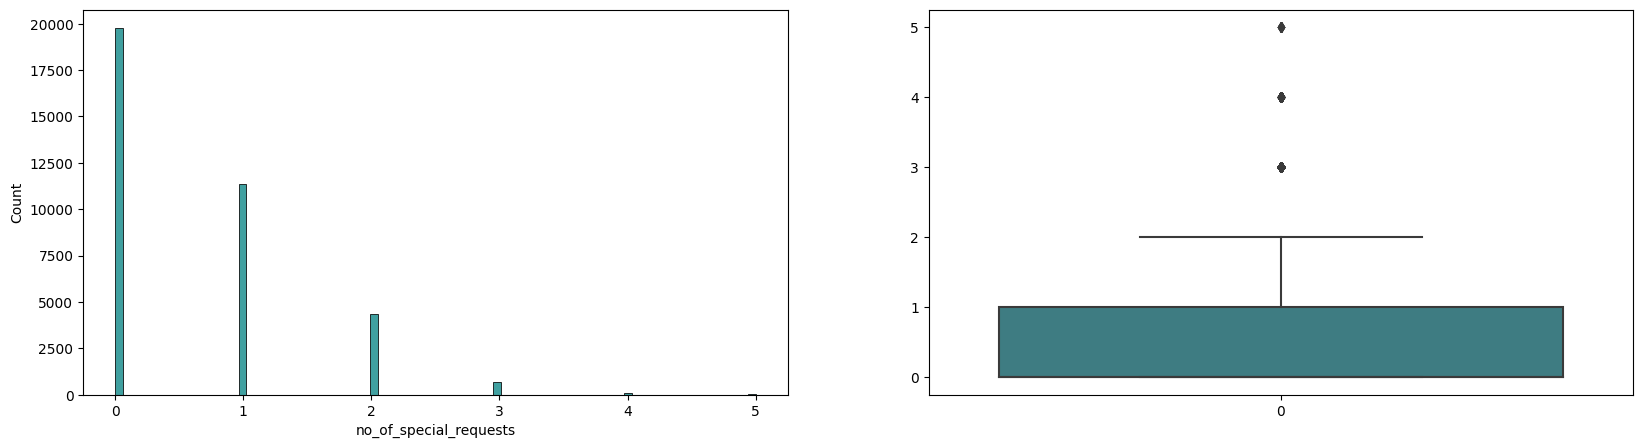

In [17]:
# Numerical Feature
for feature in num_features:
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    sns.histplot(data[feature], ax=ax[0], color="teal")
    sns.boxplot(data[feature], ax=ax[1], palette="crest")

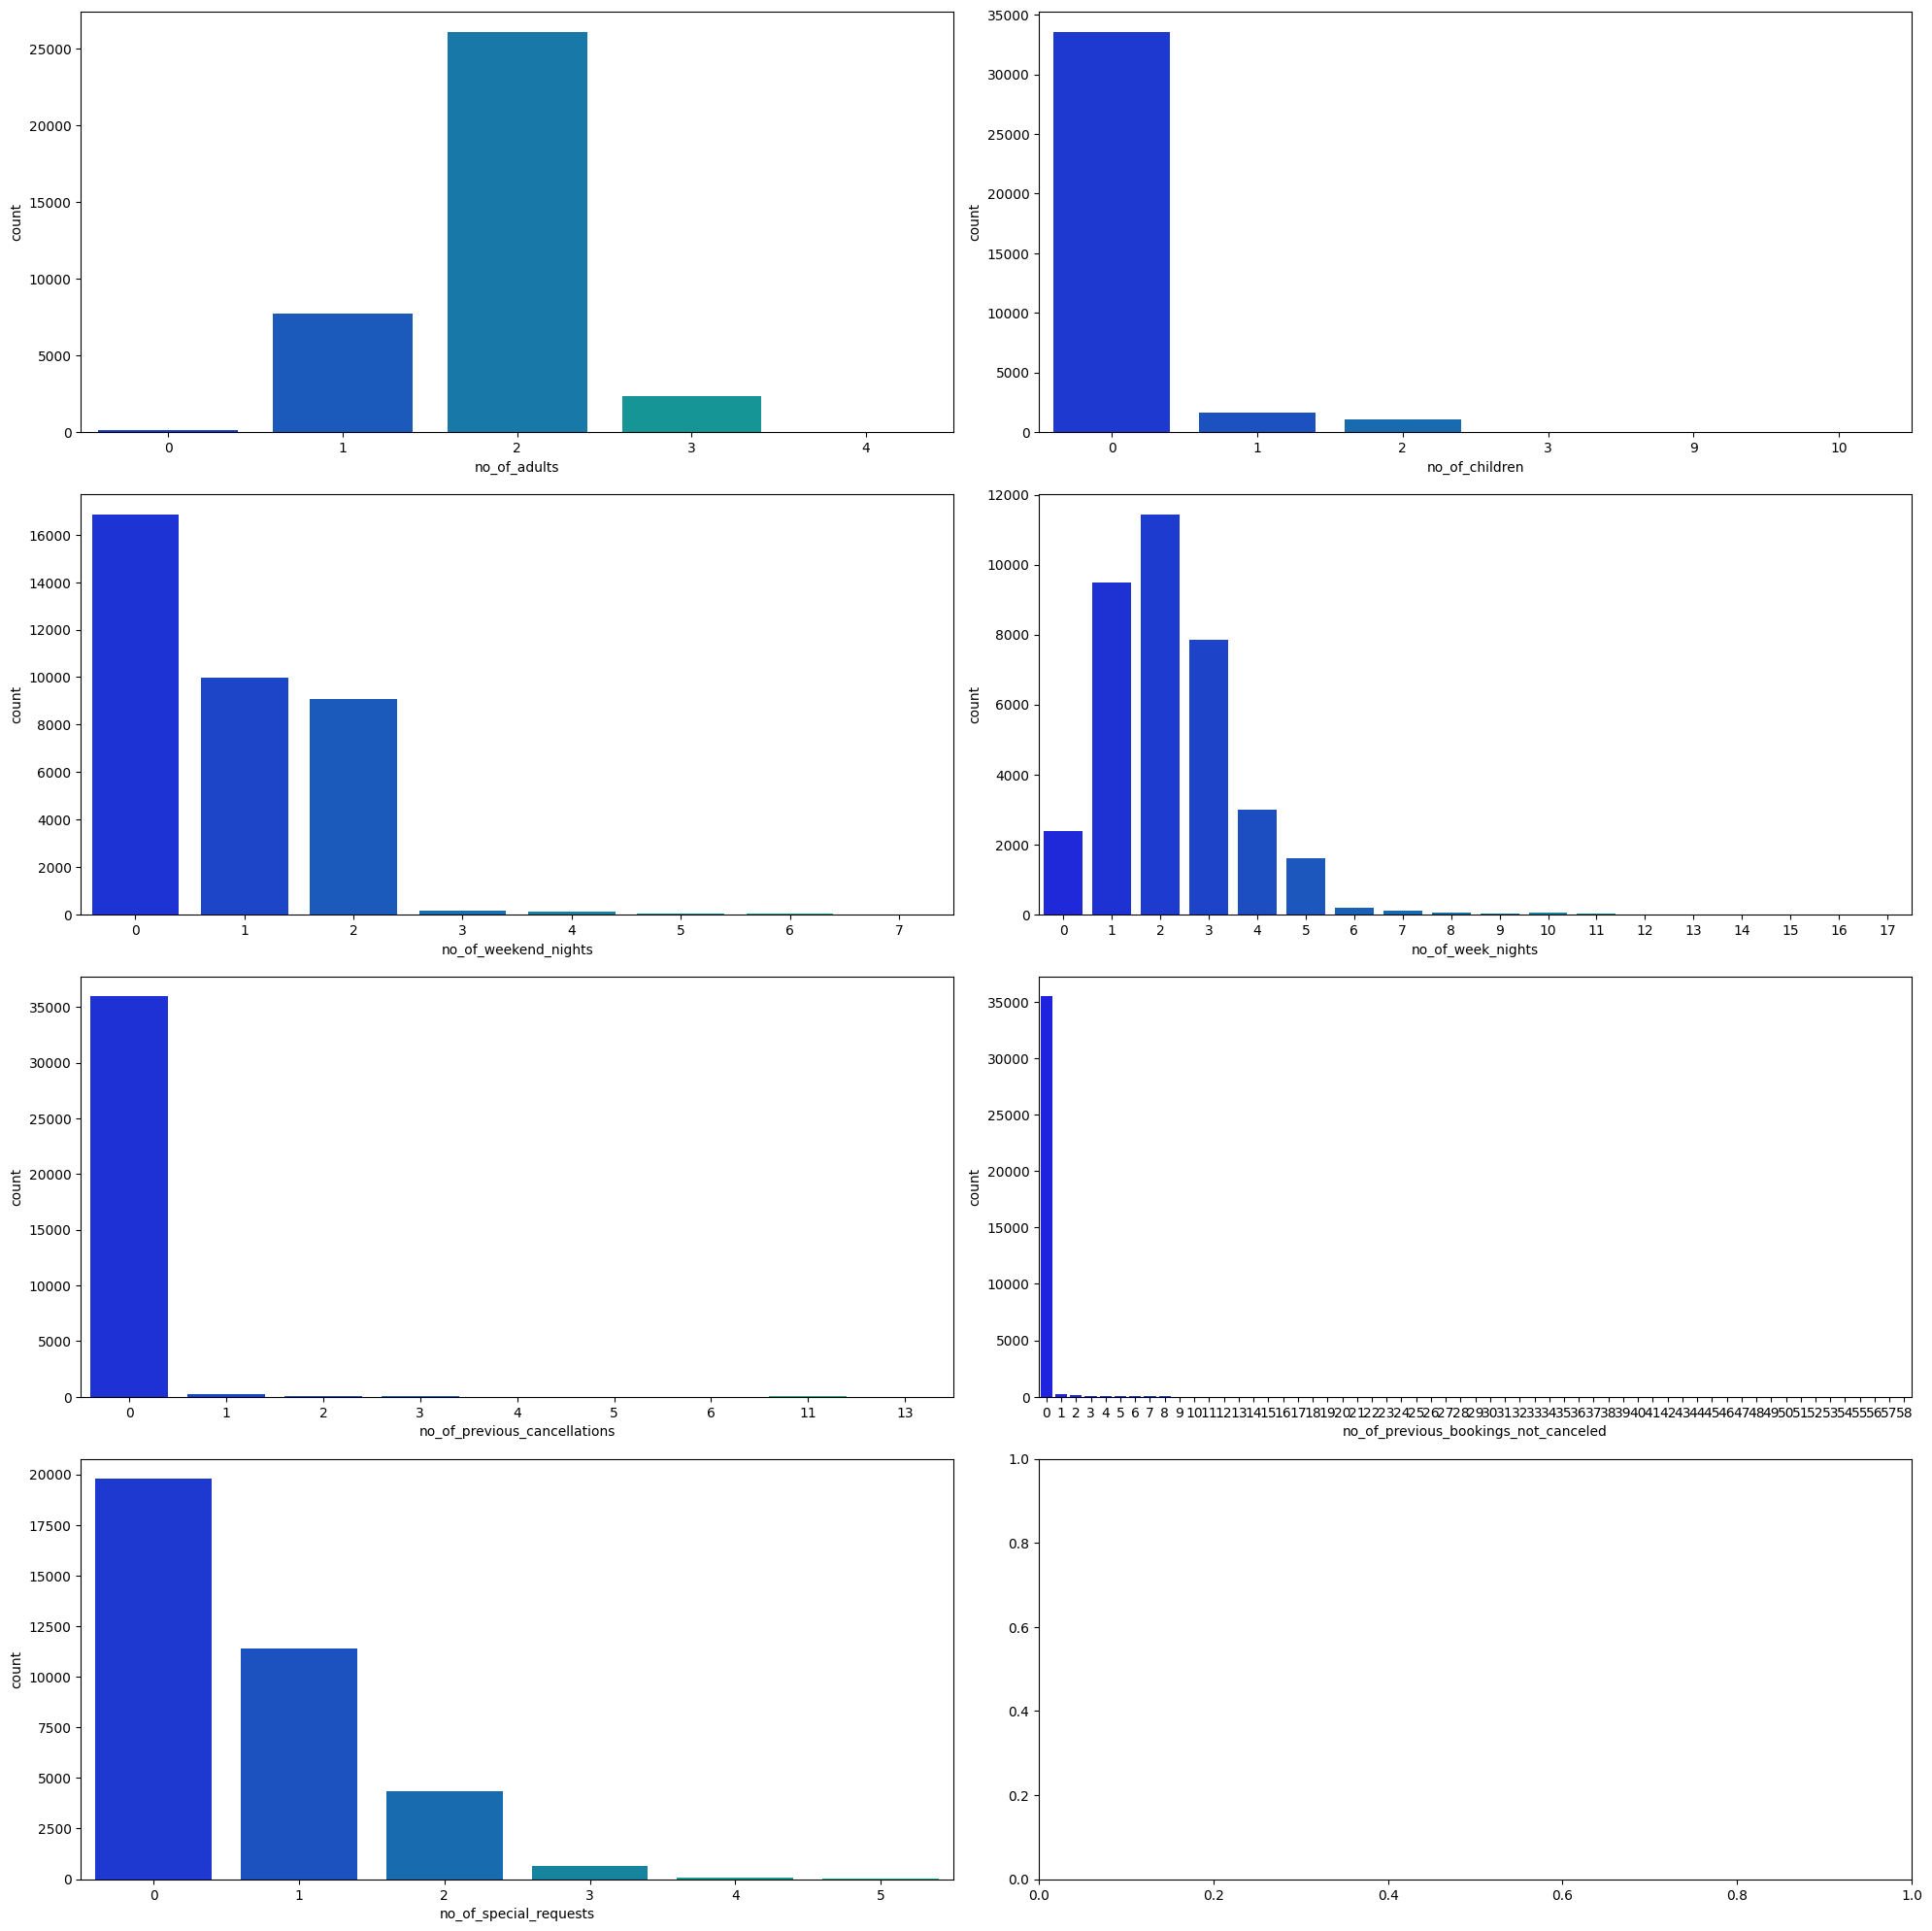

In [18]:
num_tem_features = [
    "no_of_adults", 
    "no_of_children", 
    "no_of_weekend_nights", 
    "no_of_week_nights", 
    "no_of_previous_cancellations", 
    "no_of_previous_bookings_not_canceled", 
    "no_of_special_requests"
]

n_rows = 4
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(num_tem_features):
            ax_i = ax[r, c]
            sns.countplot(x=num_tem_features[i], data=data, palette='winter', ax=ax_i);

plt.tight_layout()
plt.show()

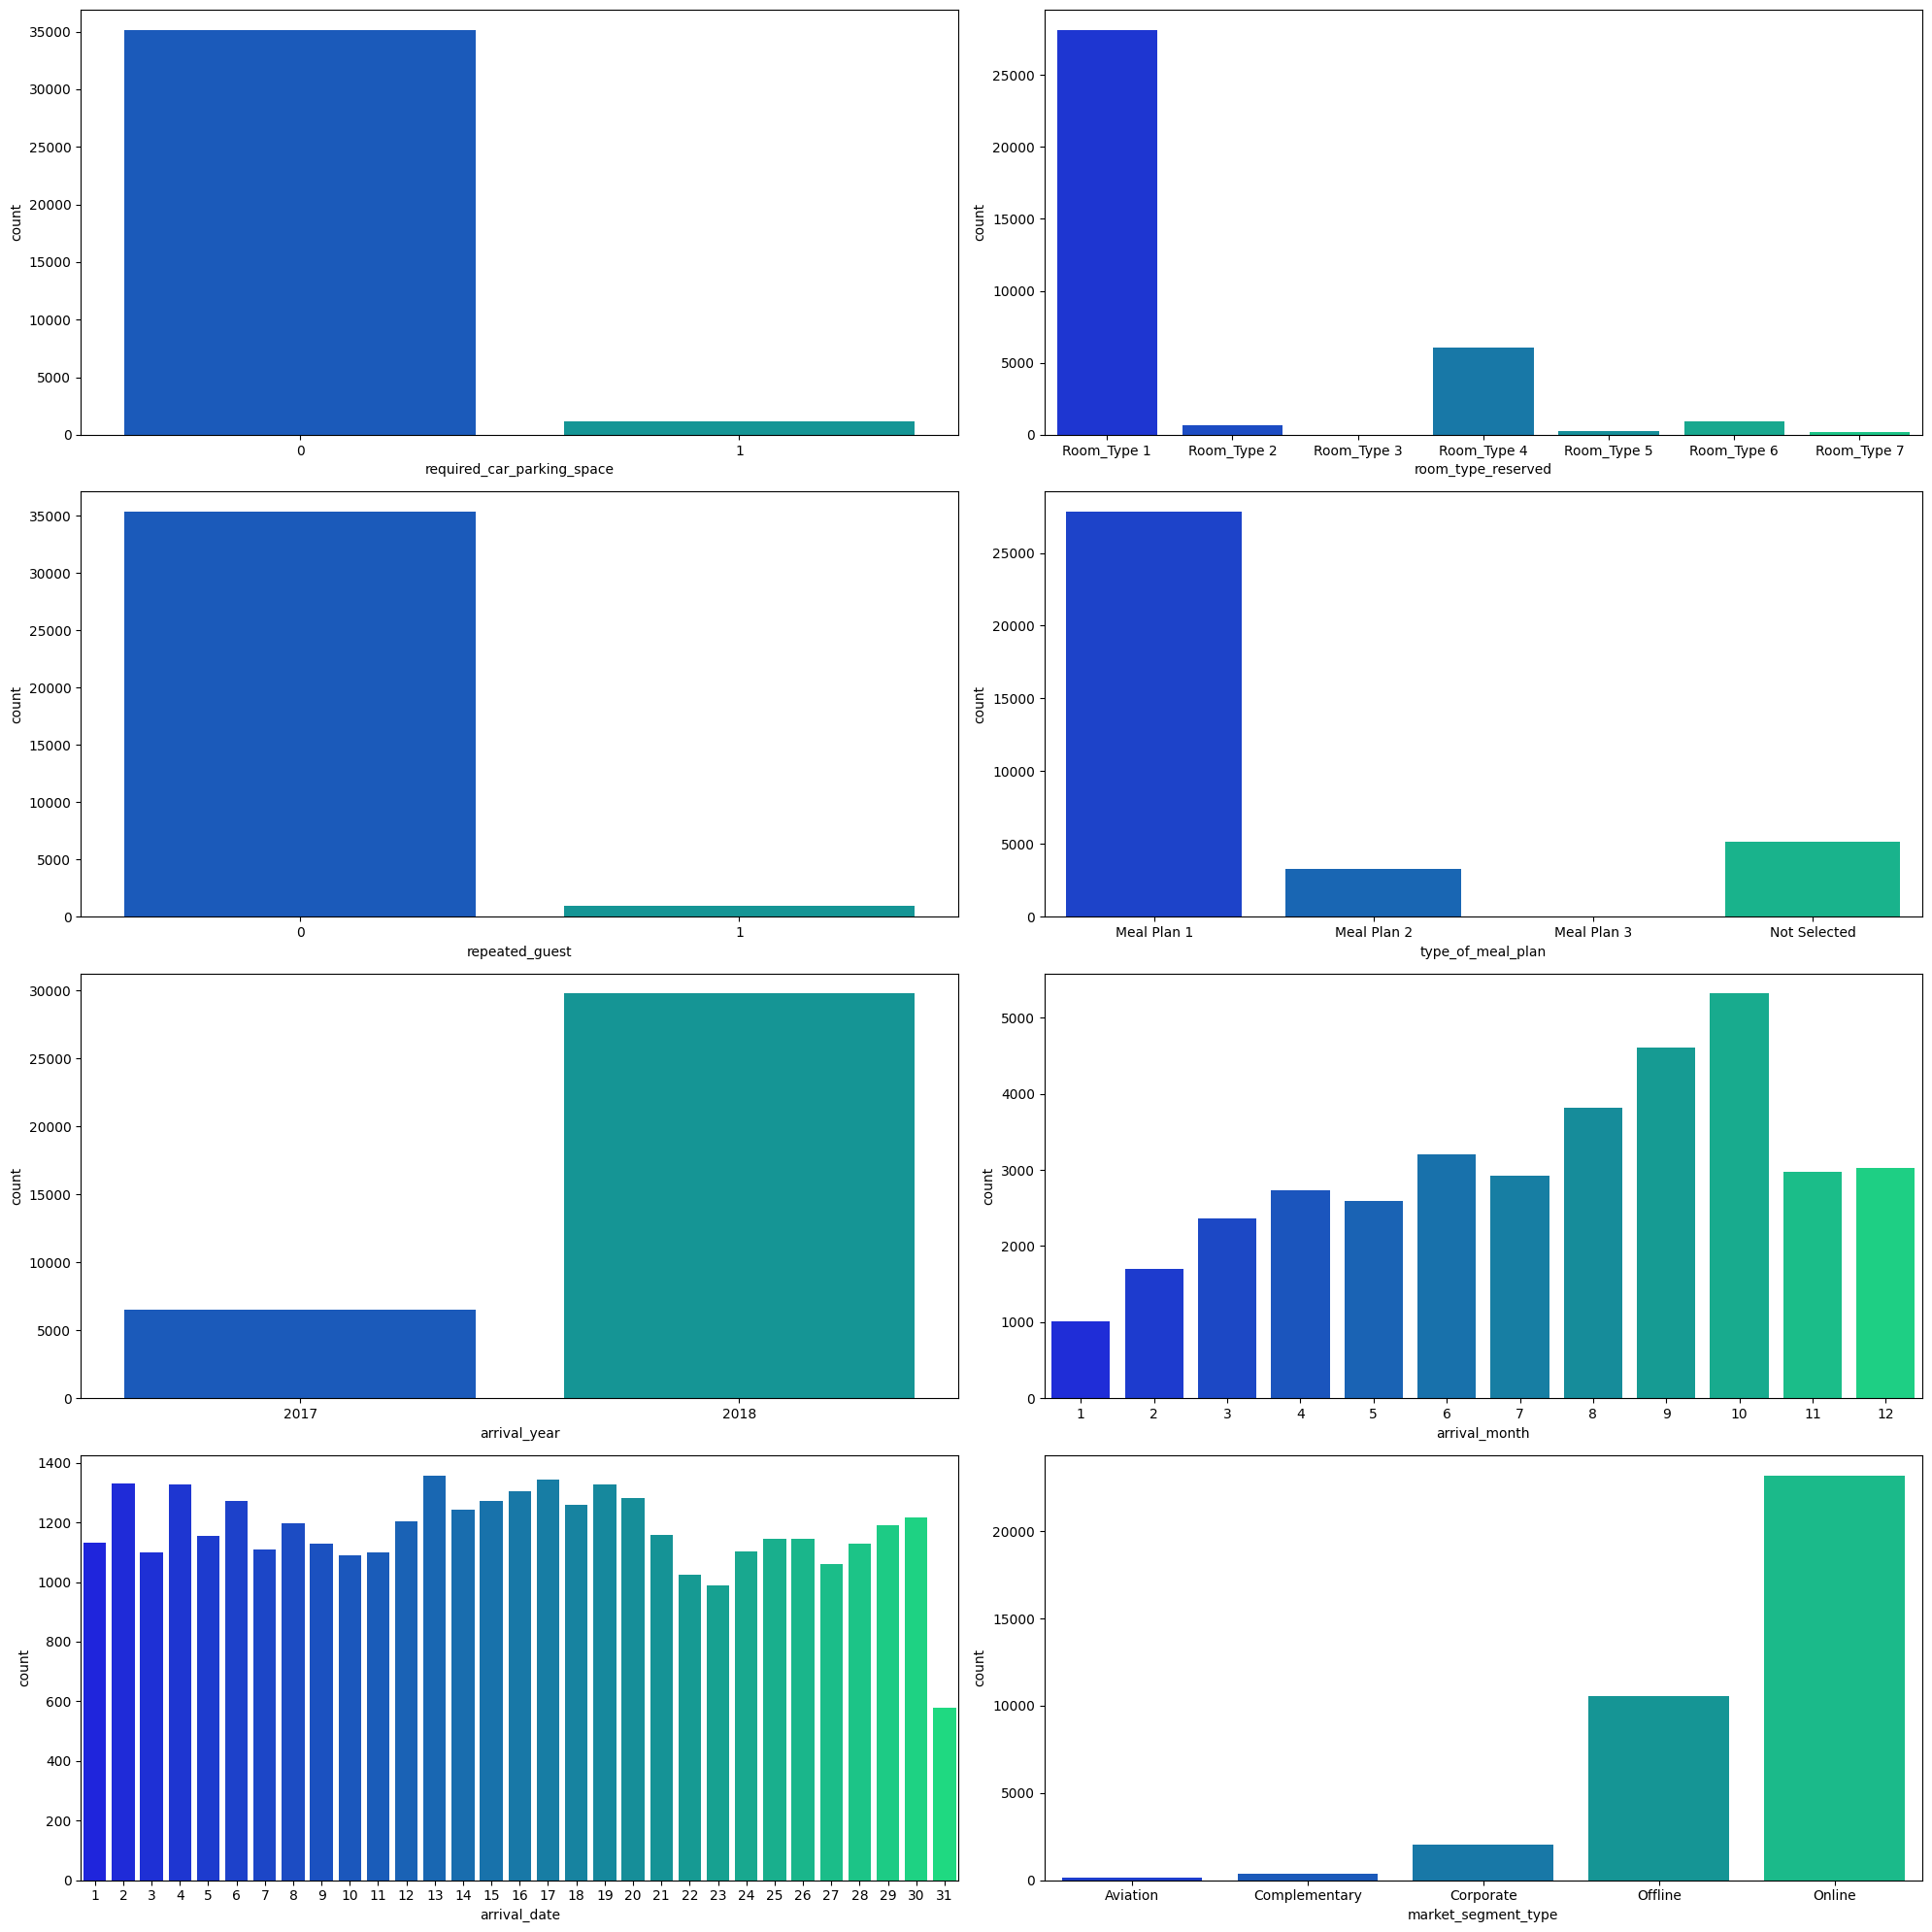

In [19]:
# Categorical Features
n_rows = 4
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cat_features):
            ax_i = ax[r, c]
            sns.countplot(x=cat_features[i], data=data, palette='winter', ax=ax_i);

plt.tight_layout()
plt.show()

##### Bivariate Analysis

<Axes: >

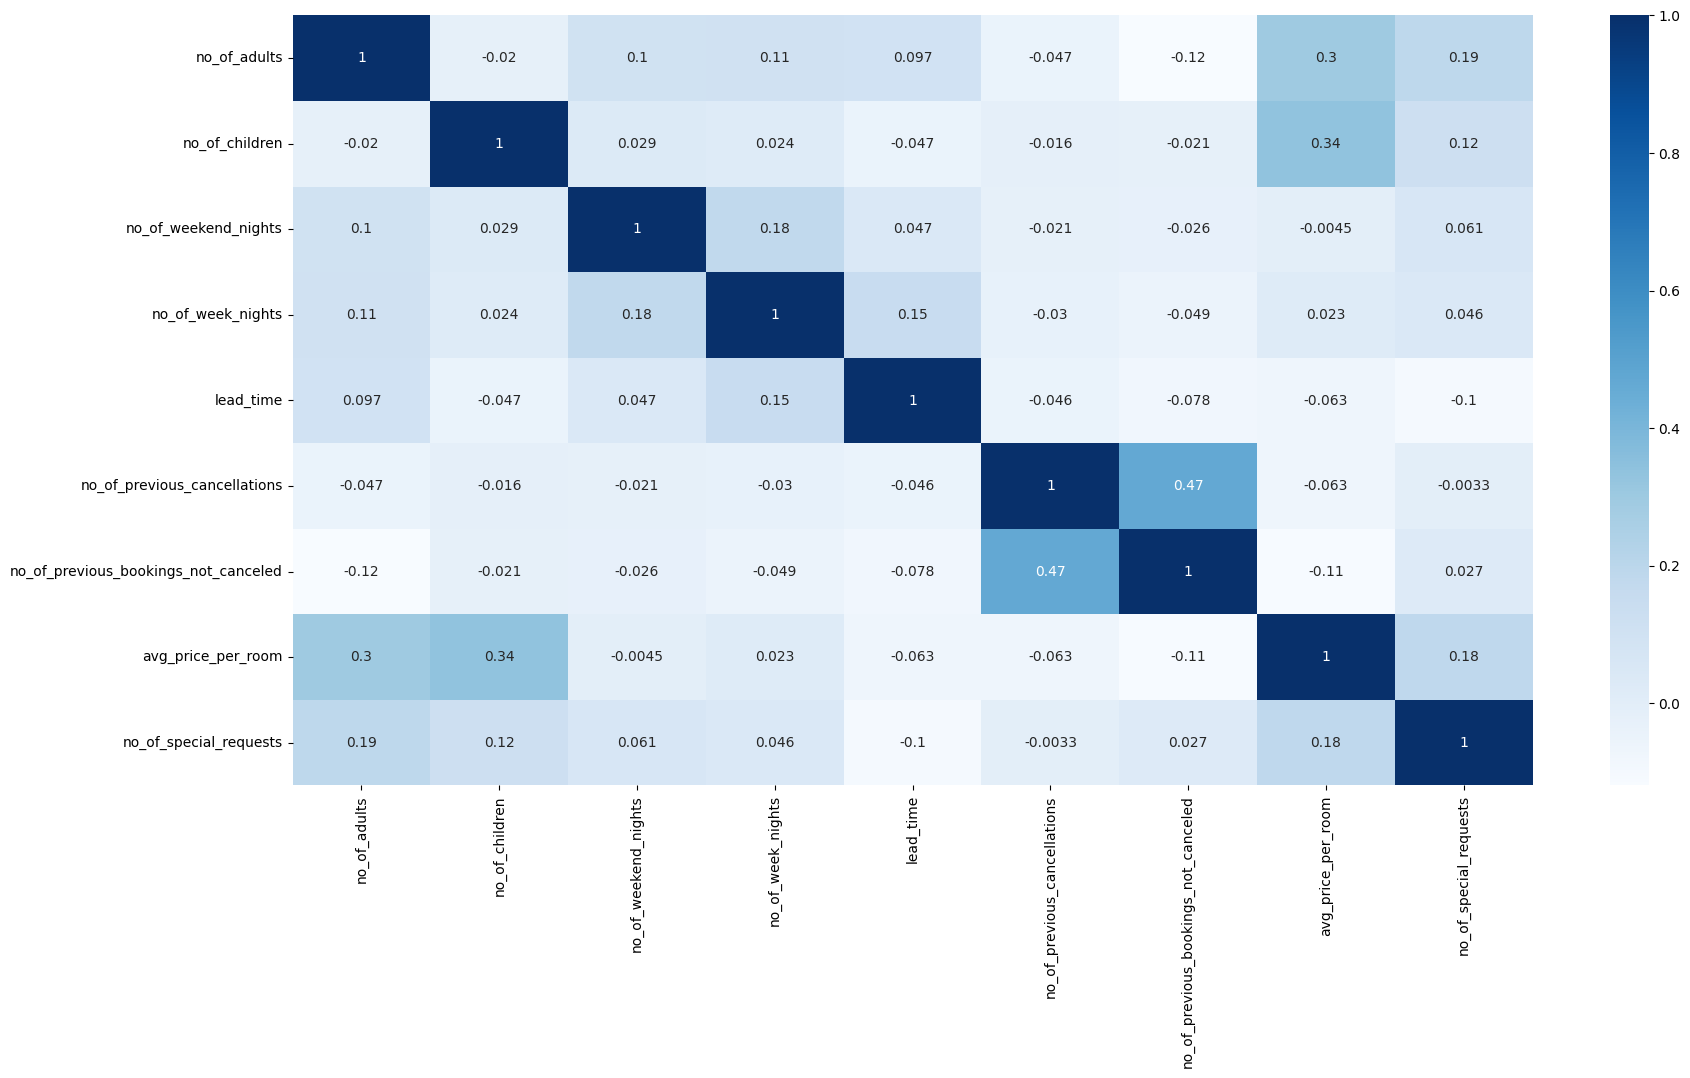

In [20]:
# Drawing the correlation diagram
plt.figure(figsize=(20, 10), dpi=100)
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Blues)

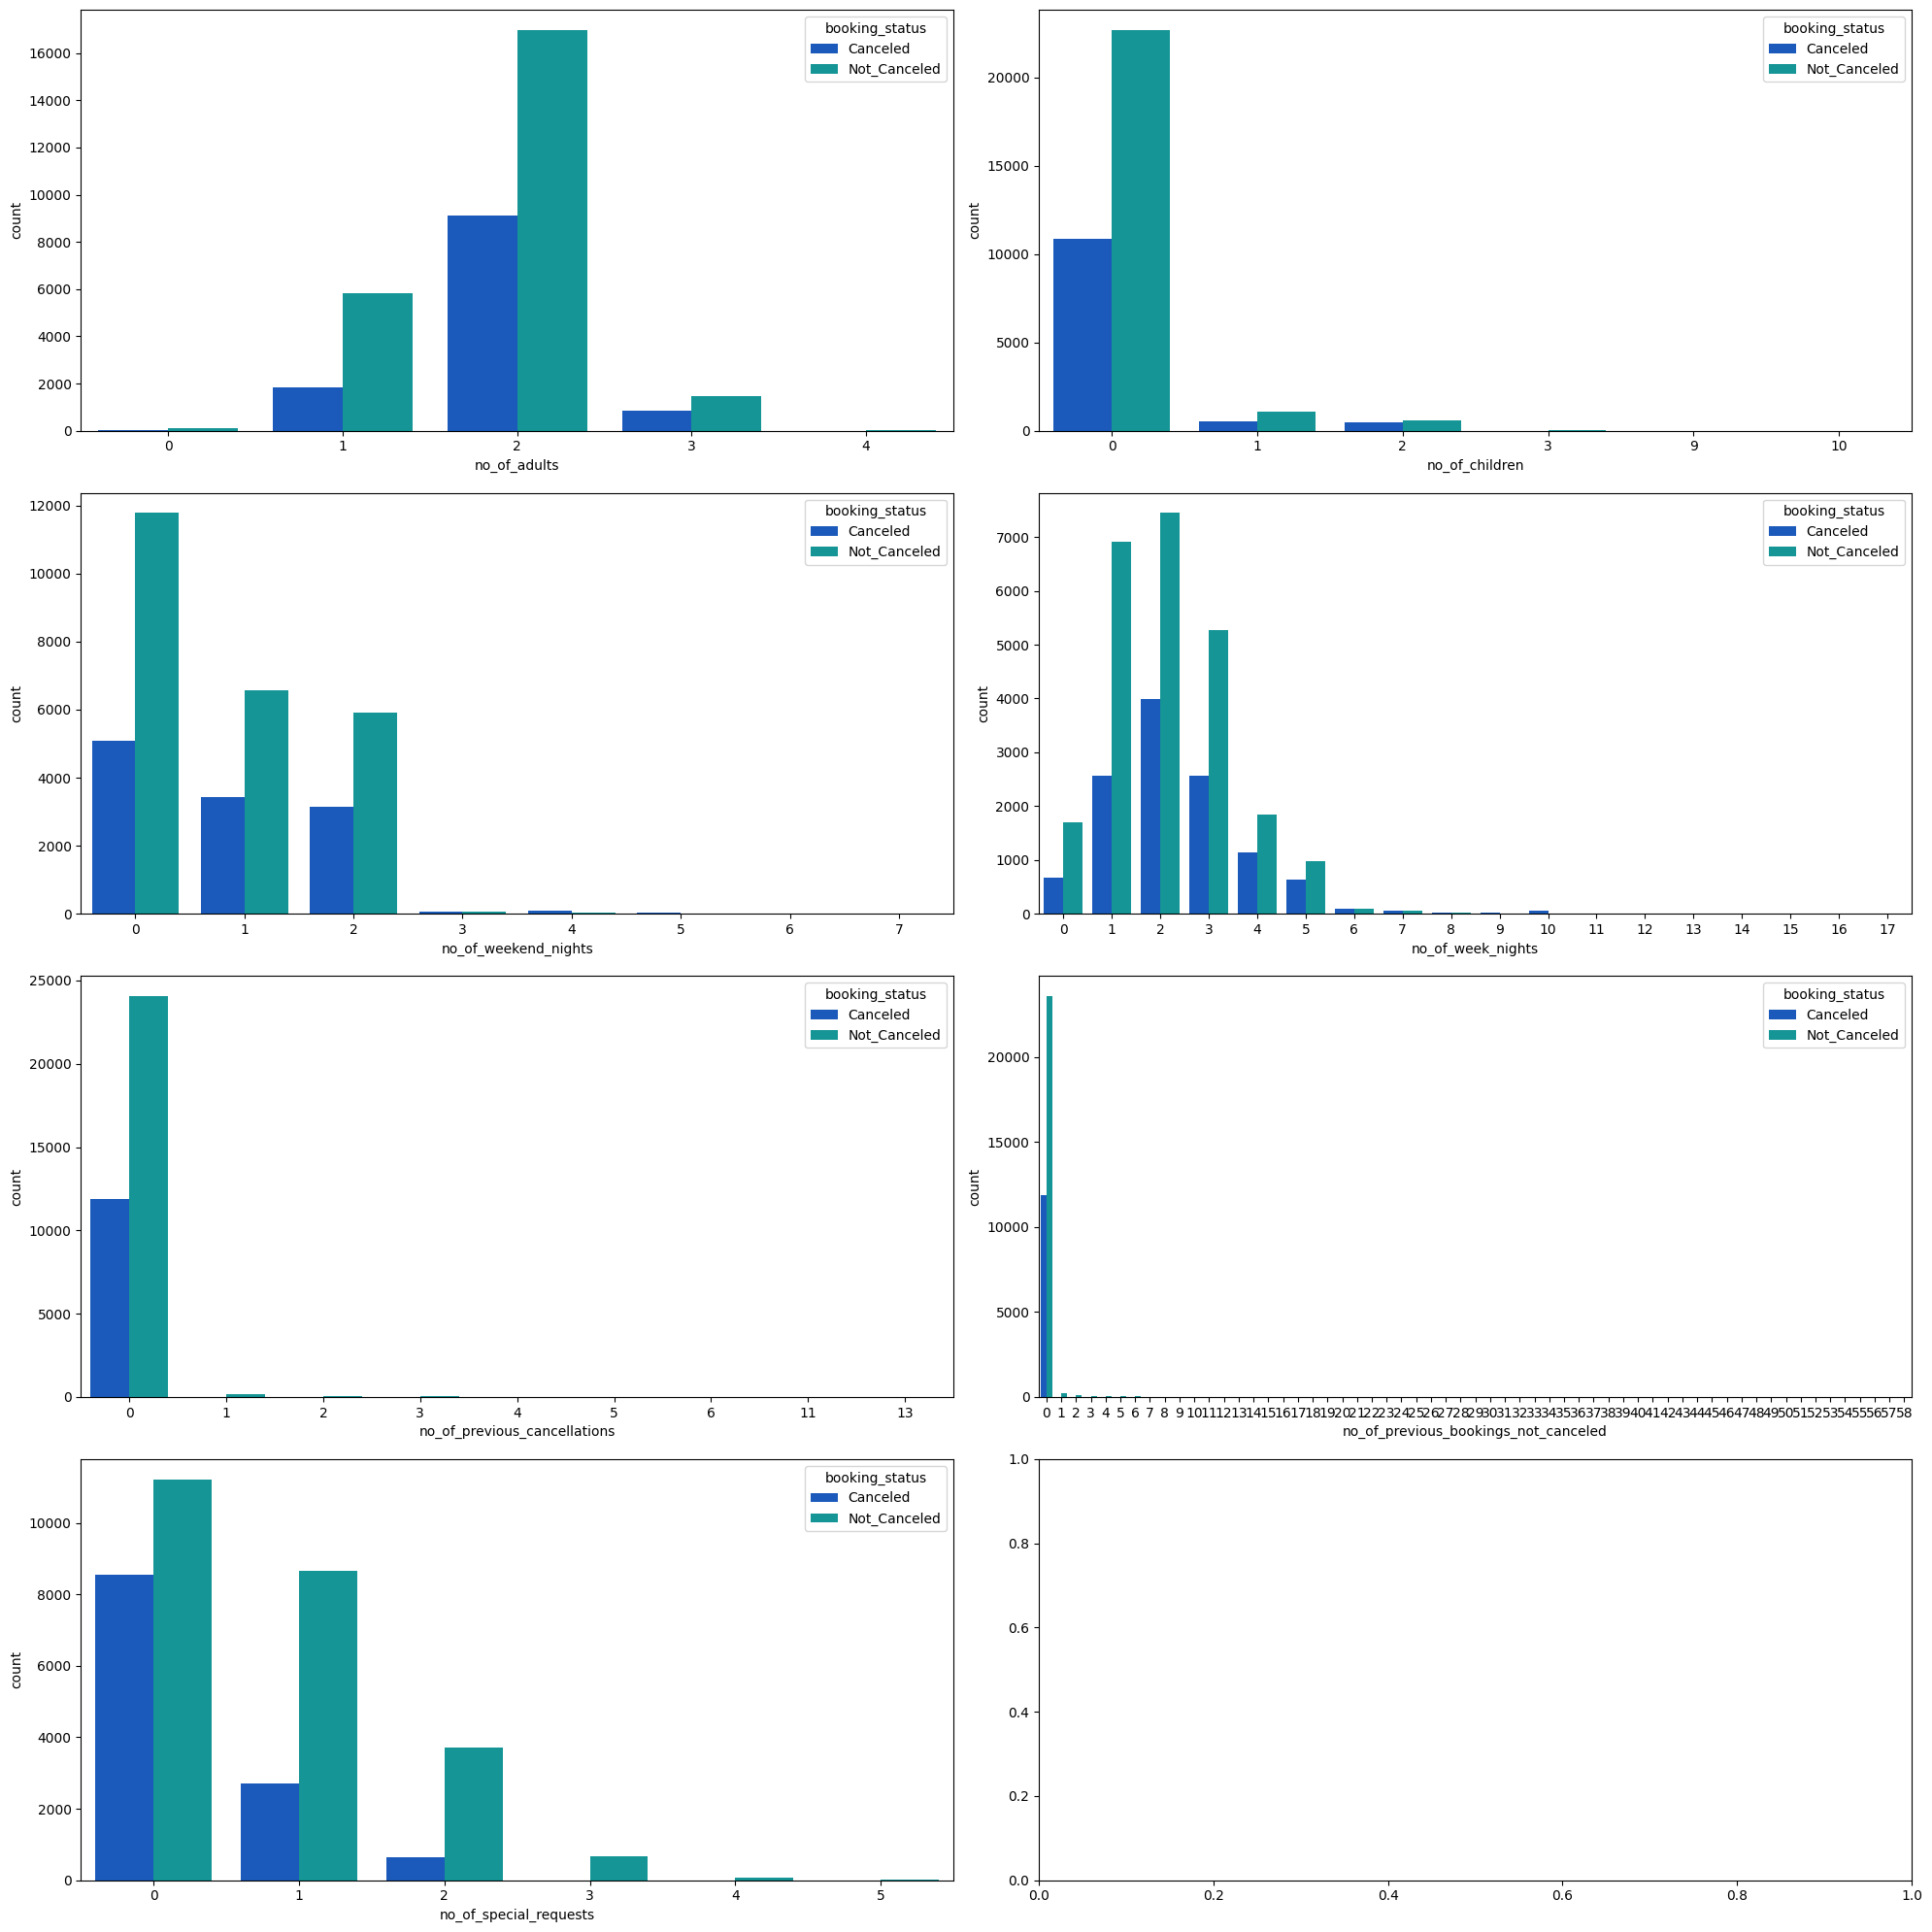

In [21]:
num_tem_features = [
    "no_of_adults", 
    "no_of_children", 
    "no_of_weekend_nights", 
    "no_of_week_nights", 
    "no_of_previous_cancellations", 
    "no_of_previous_bookings_not_canceled", 
    "no_of_special_requests"
]

n_rows = 4
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(num_tem_features):
            ax_i = ax[r, c]
            sns.countplot(x=num_tem_features[i], data=data, hue="booking_status", palette='winter', ax=ax_i);

plt.tight_layout()
plt.show()

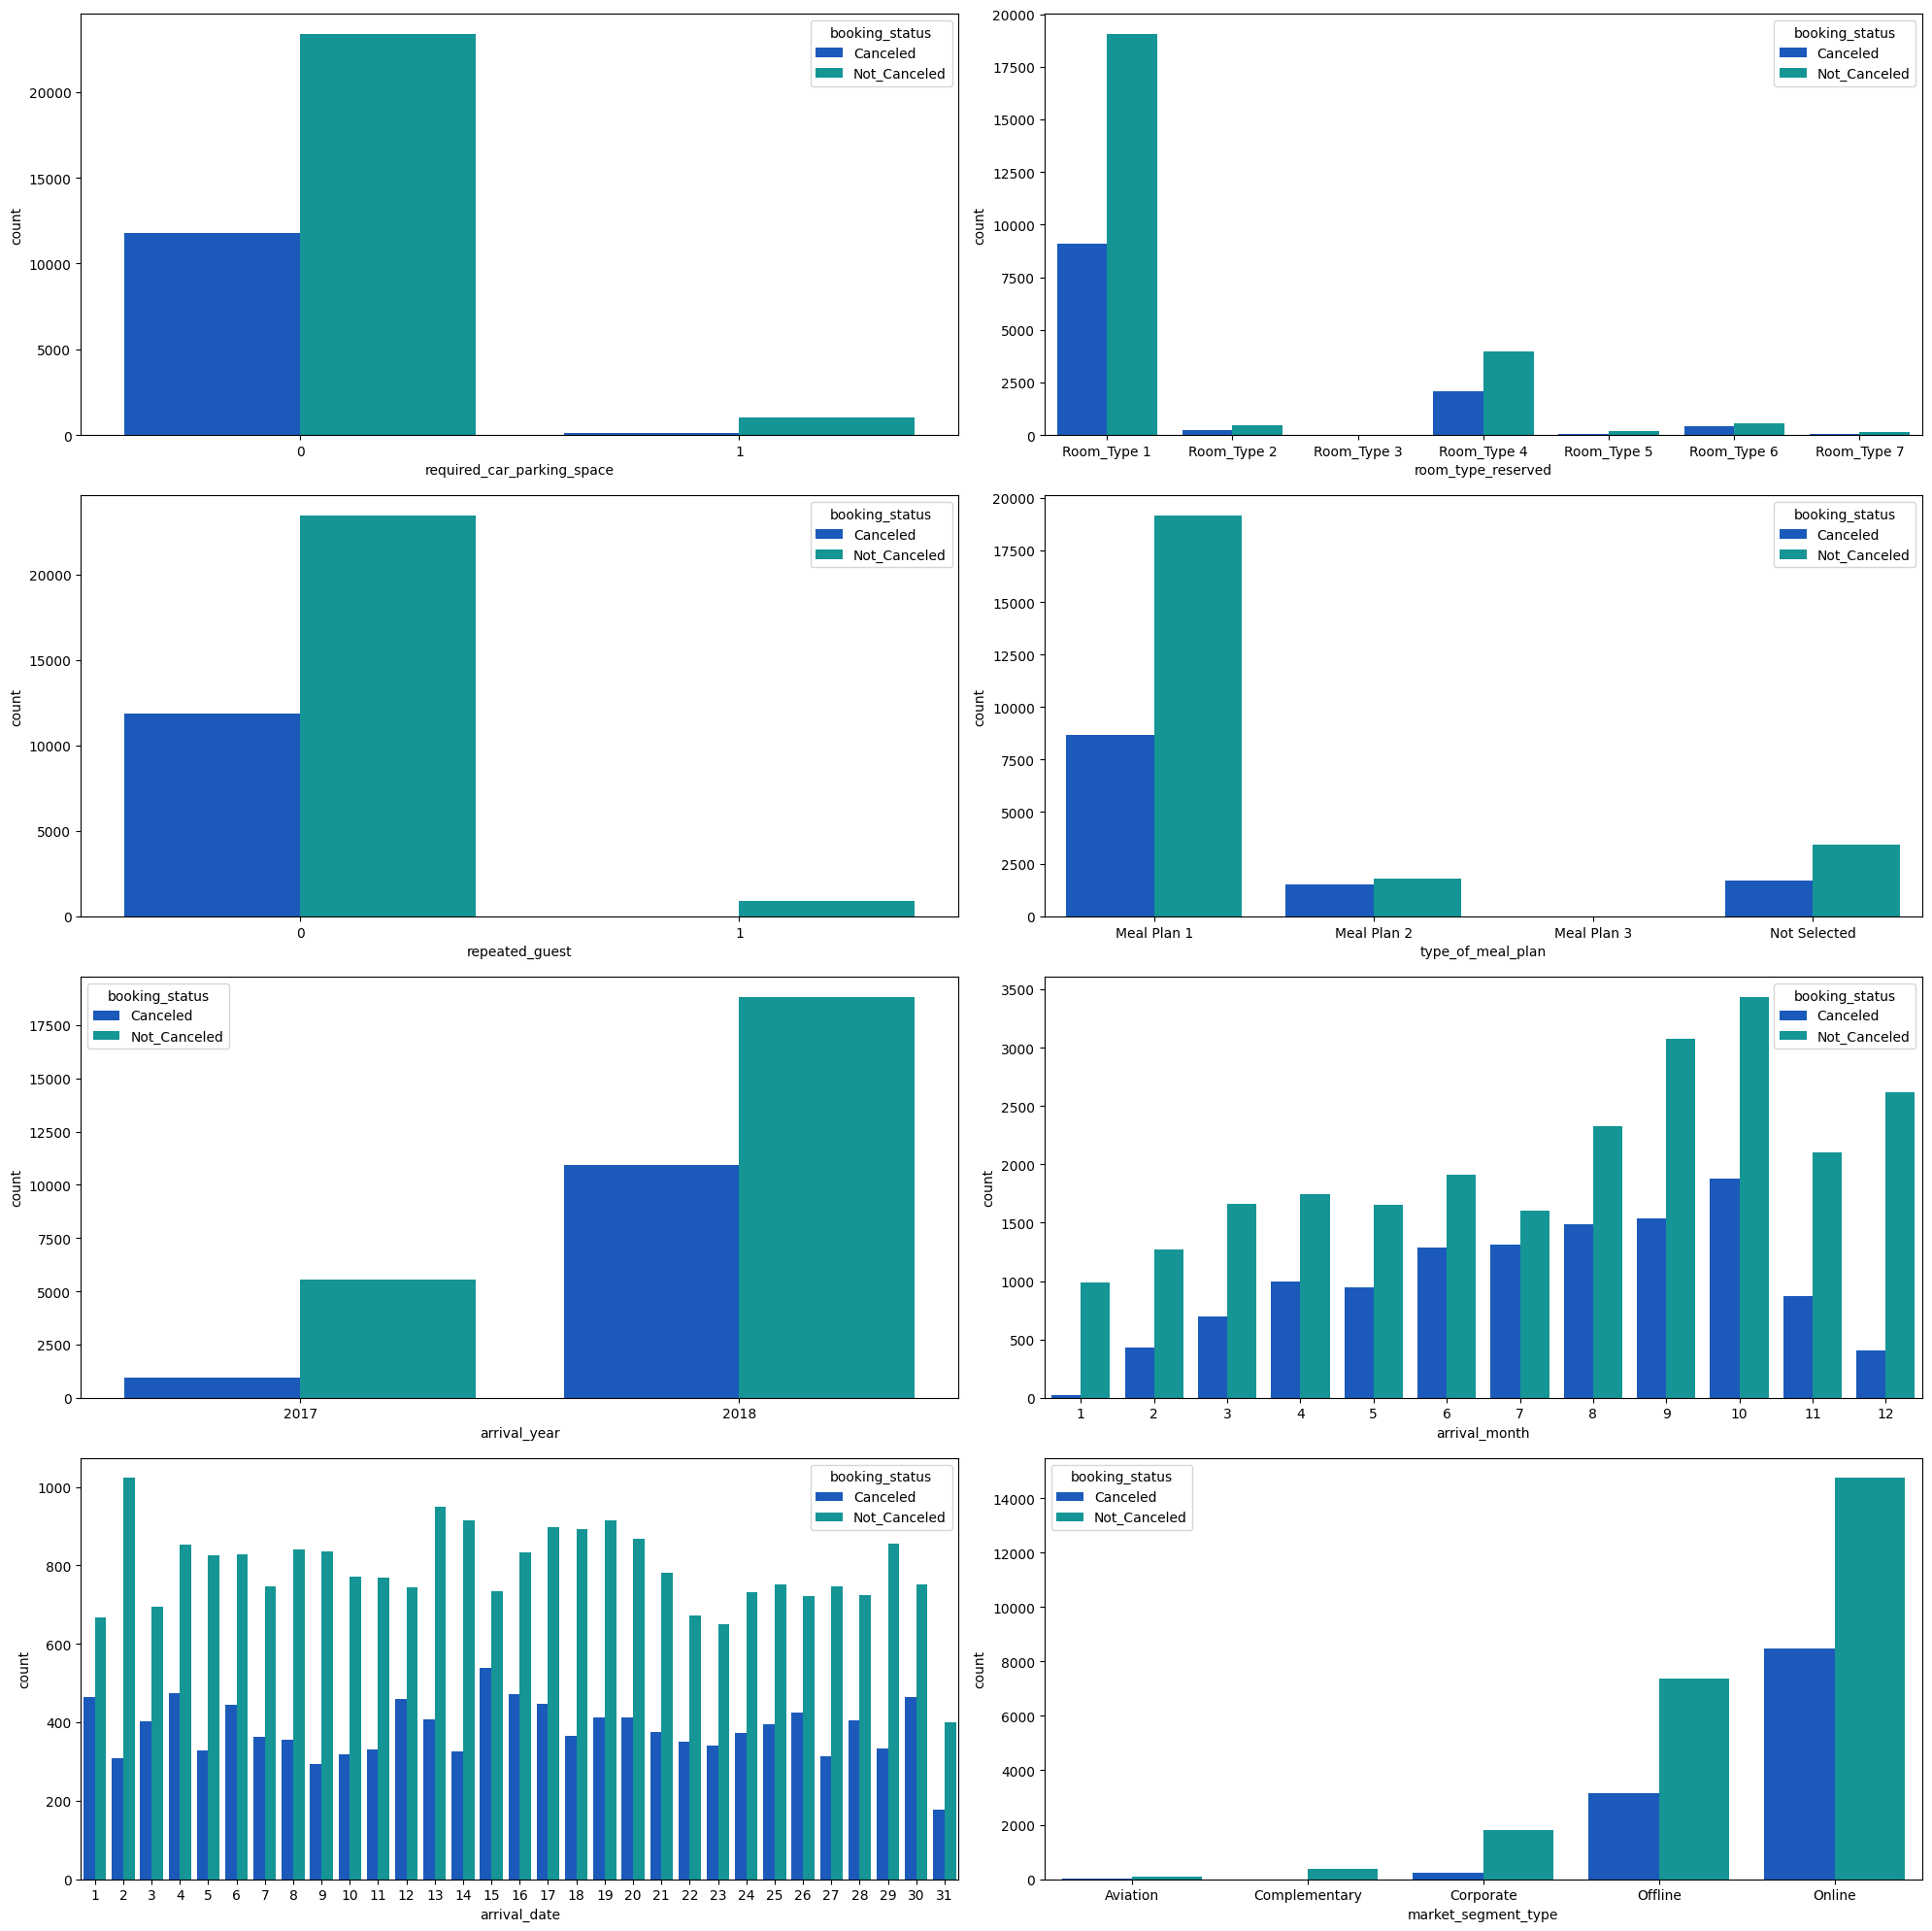

In [22]:
# Categorical Features
n_rows = 4
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cat_features):
            ax_i = ax[r, c]
            sns.countplot(x=cat_features[i], data=data, hue="booking_status", palette='winter', ax=ax_i);

plt.tight_layout()
plt.show()

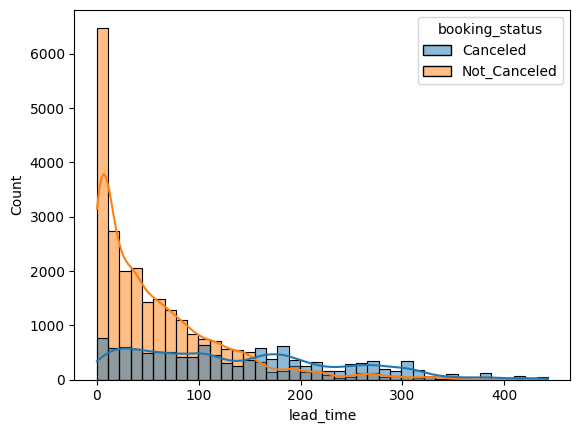

In [23]:
sns.histplot(data = data, x = 'lead_time', hue = 'booking_status', bins = 40, kde = True);

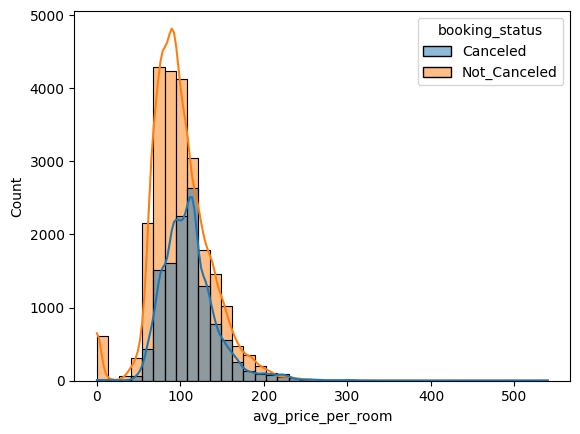

In [24]:
sns.histplot(data = data, x = 'avg_price_per_room', hue = 'booking_status', bins = 40, kde = True);

#### **3. Machine Learning**

In [25]:
data['booking_status'] = data['booking_status'].map({'Canceled' : 0, 'Not_Canceled' : 1})

In [26]:
target = "booking_status"
x = data.drop(target, axis=1)
y = data[target]

In [27]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
ros = RandomOverSampler(random_state=42)
x_train, y_train = ros.fit_resample(x_train, y_train)

In [29]:
# Numerical Features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

In [30]:
# Nominal Features
nom_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

In [31]:
# Ordinal Features
ord_features = [
    "required_car_parking_space",
    "room_type_reserved",
    "repeated_guest",
]

room_types = [
    "Room_Type 1",
    "Room_Type 2",
    "Room_Type 3",
    "Room_Type 4",
    "Room_Type 5",
    "Room_Type 6",
    "Room_Type 7"
]

required_car_values = data["required_car_parking_space"].unique()
repeated_guest_values = data["repeated_guest"].unique()

ord_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder(categories=[required_car_values, room_types, repeated_guest_values])),
])

In [32]:
preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, num_features),
    ("ord_features", ord_transformer, ord_features),
    ("nom_features", nom_transformer, nom_features)
])

In [33]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [35]:
cls = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = cls.fit(x_train, x_test, y_train, y_test)
print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 17%|█▋        | 5/29 [01:03<05:57, 14.91s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 41%|████▏     | 12/29 [10:44<49:45, 175.59s/it]

LabelPropagation model failed to execute
Unable to allocate 11.4 GiB for an array with shape (39102, 39102) and data type float64


 45%|████▍     | 13/29 [20:55<1:21:58, 307.44s/it]

LabelSpreading model failed to execute
Unable to allocate 11.4 GiB for an array with shape (39102, 39102) and data type float64


 90%|████████▉ | 26/29 [26:46<02:22, 47.51s/it]   

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [26:50<00:00, 55.54s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.89     0.89      0.90   
XGBClassifier                      0.89               0.88     0.88      0.89   
BaggingClassifier                  0.89               0.88     0.88      0.89   
LGBMClassifier                     0.88               0.87     0.87      0.88   
ExtraTreesClassifier               0.89               0.87     0.87      0.89   
DecisionTreeClassifier             0.88               0.86     0.86      0.88   
SVC                                0.84               0.84     0.84      0.85   
ExtraTreeClassifier                0.85               0.83     0.83      0.85   
NuSVC                              0.82               0.82     0.82      0.83   
AdaBoostClassifier                 0.80               0.79     0.79      0.80   
LinearDiscriminantAnalysis  